# The task is to predict the pricing of used cars from manifacturer Audi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [18]:
plt.style.use('seaborn')

## Step 1: Inspect

In [2]:
path = './datasets/audi.csv'
audi = pd.read_csv(path)

In [3]:
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [7]:
print(audi.model.unique())
print()
print(f'# models = {audi.model.nunique()}')

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']

# models = 26


In [11]:
print(audi.year.min(),'-', audi.year.max())

1997 - 2020


In [23]:
audi.fuelType.unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

In [12]:
audi.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [13]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


Hist plot and see if there are outliers

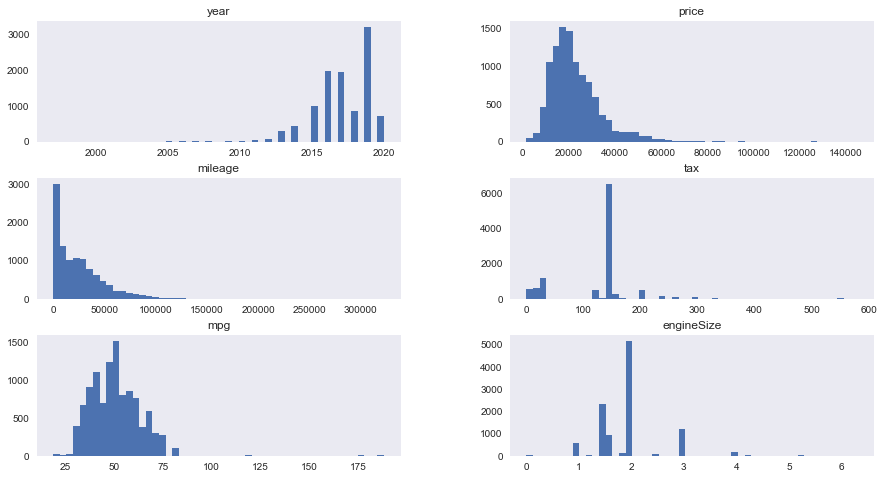

In [20]:
audi.hist(layout=(3,2), figsize=(15,8), bins=50, grid=False)
plt.show()

array([1.4, 2. , 1. , 3. , 1.6, 1.8, 1.5, 4. , 2.5, 1.2, 4.2, 2.9, 5.2,
       1.9, 2.7, 0. , 3.2, 4.1, 6.3])

In [23]:
audi.corr().price.apply(abs).sort_values(ascending=False)

price         1.000000
mpg           0.600334
year          0.592581
engineSize    0.591262
mileage       0.535357
tax           0.356157
Name: price, dtype: float64

However `model`, `fuelType` `transmission` and are absent as they are non-numerical. We fix this as 

## Step 2: Visualize

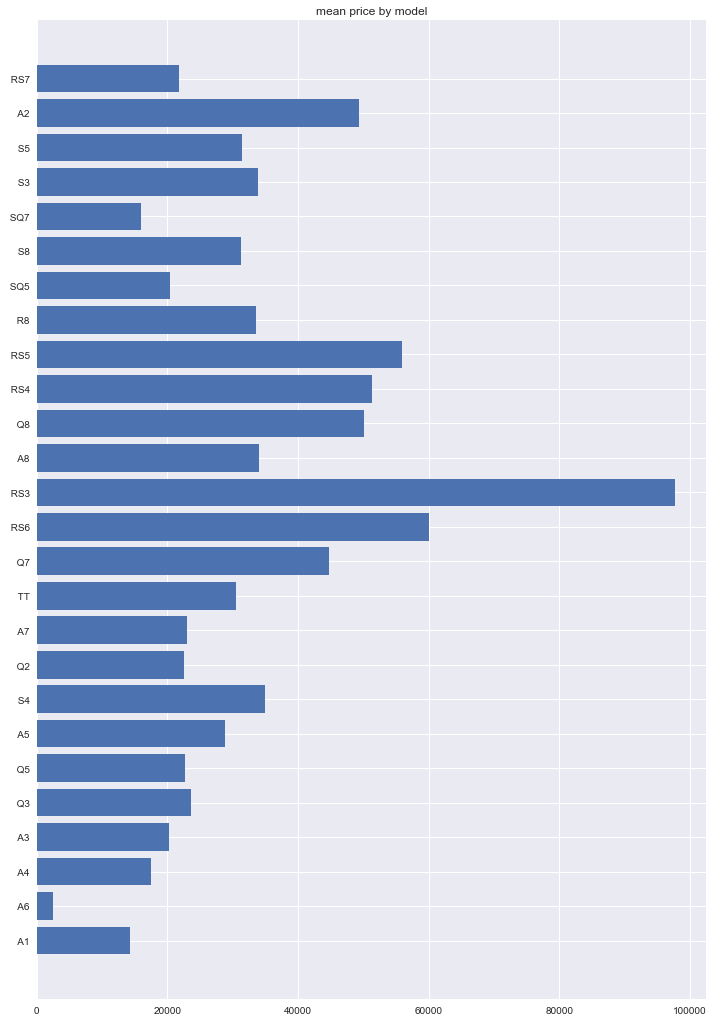

In [52]:
# barplots for categorical features
cat_features = ['year', 'model', 'transmission', 'fuelType']
plt.figure(figsize=(12, 18))
plt.barh(audi.model.unique(), audi.groupby('model').price.mean())
plt.title('mean price by model')
plt.show()

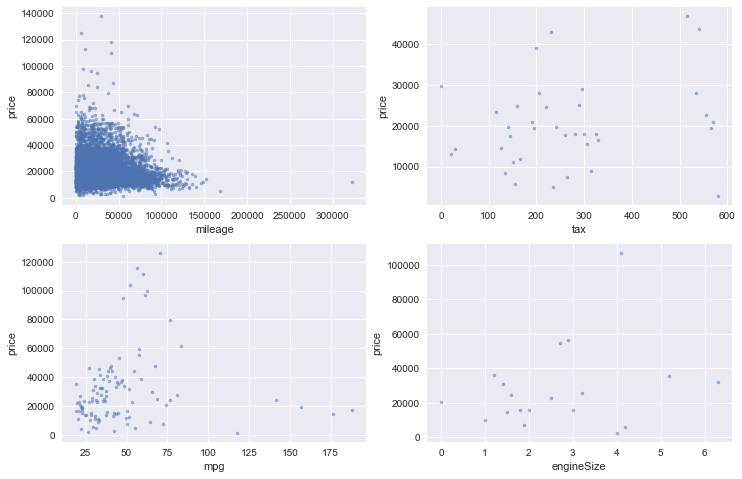

In [66]:
num_features = ['mileage', 'tax', 'mpg', 'engineSize']
plt.subplots(figsize=(12,8))
for i, feat in enumerate(num_features):
    plt.subplot(2,2,i+1)
    plt.scatter(audi[feat].unique(), audi.groupby(feat).price.mean(),
                alpha=.5, s=10)
    plt.xlabel(feat)
    plt.ylabel('price')
    
plt.show()

## Step 3: Separate training and test sets

We stratify on the year feature after applying further binning. We bin years 

In [26]:
audi.year.value_counts().sort_index()

1997       1
1998       1
2002       2
2003       6
2004       5
2005       7
2006       9
2007      16
2008      21
2009      23
2010      32
2011      47
2012      85
2013     291
2014     447
2015     999
2016    1964
2017    1935
2018     864
2019    3197
2020     716
Name: year, dtype: int64

In [30]:
interval1 = pd.Interval(left=1997, right=2010, closed='both')
interval2 = pd.Interval(left=2011, right=2015, closed='both')
interval3 = pd.Interval(left=2016, right=2020, closed='both')
interval_idx = pd.IntervalIndex(data=(interval1,
                                     interval2,
                                     interval3),
                               closed='both')
cat_stratify = pd.cut(audi.year, interval_idx)
cat_stratify

0        [2016, 2020]
1        [2016, 2020]
2        [2016, 2020]
3        [2016, 2020]
4        [2016, 2020]
             ...     
10663    [2016, 2020]
10664    [2016, 2020]
10665    [2016, 2020]
10666    [2016, 2020]
10667    [2016, 2020]
Name: year, Length: 10668, dtype: category
Categories (3, interval[int64]): [[1997, 2010] < [2011, 2015] < [2016, 2020]]

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
train_idx, test_idx = next(splitter.split(audi.drop(columns='price'), cat_stratify))
X_train, y_train = audi.drop('price', axis=1).iloc[train_idx], audi.copy().price.iloc[train_idx]
X_test, y_test = audi.drop('price', axis=1).iloc[test_idx], audi.copy().price.iloc[test_idx]

Separate numerical from categorical features visibly. Convert labels to floats.

In [39]:
y_train, y_test = y_train.astype(np.int64), y_test.astype(np.int64)

In [40]:
X_train = X_train.loc[:, ['mileage', 'tax', 'mpg', 'engineSize', 'model',
                         'year', 'transmission', 'fuelType']]
X_test = X_test.loc[:, ['mileage', 'tax', 'mpg', 'engineSize', 'model',
                         'year', 'transmission', 'fuelType']]

In [60]:
from sklearn.preprocessing import LabelEncoder

cat_feat = ['model','year', 'transmission', 'fuelType']
encoder = LabelEncoder()
for col in cat_feat:
        X_train[col] = encoder.fit_transform(X_train[col])

In [61]:
from sklearn.preprocessing import StandardScaler

num_feat = ['mileage', 'tax', 'mpg', 'engineSize']
transformer = StandardScaler()
X_train.loc[:, num_feat] = \
transformer.fit_transform(X_train.loc[:, num_feat])

In [62]:
X_train

,mileage,tax,mpg,engineSize,model,year,transmission,fuelType
2609,-0.872291,0.286541,-0.090352,-0.555860,8,18,1,0
8465,-0.050642,0.286541,1.143502,0.107967,3,16,0,0
9113,0.297186,0.286541,1.388740,0.107967,4,16,0,0
3165,-0.650073,0.286541,-1.316543,1.767535,12,18,2,0
3326,-1.008135,0.286541,-1.377853,1.767535,11,18,0,0
...,...,...,...,...,...,...,...,...
8022,0.422584,0.286541,-0.220635,-0.887773,9,16,0,2
4705,0.905450,0.286541,0.193204,0.107967,9,16,1,0
6621,0.903709,1.106276,-0.220635,0.107967,9,12,2,0
3465,-0.935351,0.286541,-0.611483,0.107967,9,18,1,0


## Step 4: model selection and parameter tuning

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [70]:
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(f'RMSE = {np.sqrt(-scores)}')

RMSE = [5351.3145862  4609.78041054 5672.37008711 6215.77681566 5417.57860836
 5396.93786204 5395.3562687  5568.15610083 5756.94098229 4887.02255352]


Not very accurate

Let's try nonlinear algorithms

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# specify the range of hyperparameter values for the grid search to try out 
param_grid = {'n_estimators': [23, 24, 25, 26, 27], 'max_features': [2, 4, 6, 8]}

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                          scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_features': 4, 'n_estimators': 26}

In [87]:
feature_importances = pd.Series(data=grid_search.best_estimator_.feature_importances_,
              index=X_train.columns).sort_values(ascending=False)
feature_importances

mpg             0.344846
engineSize      0.192745
year            0.188352
model           0.110617
mileage         0.110105
tax             0.036061
fuelType        0.011073
transmission    0.006202
dtype: float64

In [89]:
# from most to least important
feature_importances.rank(method='first', ascending=False)

mpg             1.0
engineSize      2.0
year            3.0
model           4.0
mileage         5.0
tax             6.0
fuelType        7.0
transmission    8.0
dtype: float64

In [106]:
neg_MSE = grid_search.cv_results_['mean_test_score']\
[grid_search.cv_results_['params'].index(grid_search.best_params_)]
print(f'RMSE: {np.sqrt(-neg_MSE)}')

RMSE: 2340.3380535622136


## Step 5: Testing

In [108]:
estimator = grid_search.best_estimator_

In [109]:
cat_feat = ['model','year', 'transmission', 'fuelType']
encoder = LabelEncoder()
for col in cat_feat:
        X_test[col] = encoder.fit_transform(X_test[col])
        
num_feat = ['mileage', 'tax', 'mpg', 'engineSize']
transformer = StandardScaler()
X_test.loc[:, num_feat] = \
transformer.fit_transform(X_test.loc[:, num_feat])

In [110]:
y_pred = estimator.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE: 6076.285124512457
